### Define Data Quality KPIs

**Task 1**: Identify Relevant KPIs

**Objective**: Develop KPIs that align with organizational goals.

**Steps**:
1. Choose a dataset from a domain of your interest (e.g., sales data, healthcare records, or transaction logs).
2. Identify three KPIs that would be crucial for assessing the data quality in your chosen dataset. Consider accuracy, completeness, and timeliness.
3. Document why each KPI is important for maintaining high-quality data in your given context.

Accuracy Rate: 60.00%
Completeness Rate: 80.00%
Timeliness Rate: 40.00%


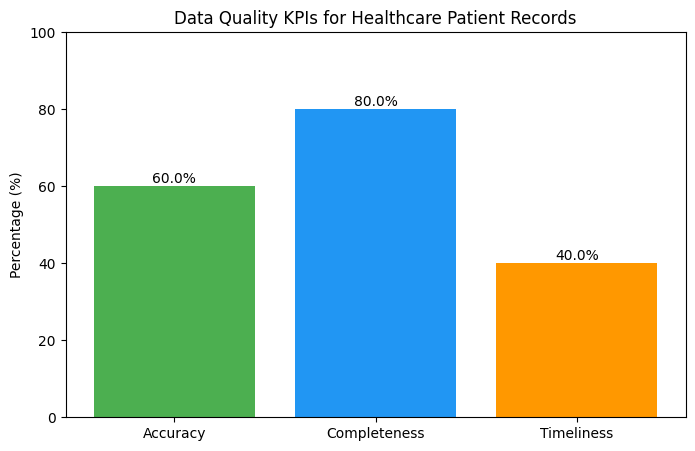

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Step 1: Create sample healthcare dataset
data = {
    'patient_id': [101, 102, 103, 104, 105],
    'age': [25, 130, 45, 60, 29],  # 130 is invalid (to test accuracy)
    'diagnosis_code': ['A01', 'B02', 'X99', 'C03', 'D04'],  # 'X99' invalid
    'lab_result': ['Positive', 'Negative', None, 'Positive', 'Negative'],
    'record_update_date': [
        datetime.now() - timedelta(days=1),   # recent
        datetime.now() - timedelta(days=10),  # outdated
        datetime.now() - timedelta(days=3),   # recent
        datetime.now() - timedelta(days=8),   # outdated
        None                                  # missing
    ]
}

df = pd.DataFrame(data)

# Step 2: Define validity criteria for KPIs
valid_diagnosis_codes = {'A01', 'B02', 'C03', 'D04'}

def is_accurate(row):
    # Age must be between 0 and 120
    if not (0 <= row['age'] <= 120):
        return False
    # Diagnosis code must be valid
    if row['diagnosis_code'] not in valid_diagnosis_codes:
        return False
    return True

# Step 3: Calculate Accuracy KPI
df['accurate'] = df.apply(is_accurate, axis=1)
accuracy_rate = df['accurate'].mean() * 100  # percentage

# Step 4: Calculate Completeness KPI
mandatory_fields = ['patient_id', 'age', 'diagnosis_code', 'lab_result']
df['complete'] = df[mandatory_fields].notnull().all(axis=1)
completeness_rate = df['complete'].mean() * 100  # percentage

# Step 5: Calculate Timeliness KPI
today = datetime.now()
timeliness_threshold = timedelta(days=7)  # Records updated within last 7 days are timely

def is_timely(date):
    if pd.isnull(date):
        return False
    return (today - date) <= timeliness_threshold

df['timely'] = df['record_update_date'].apply(is_timely)
timeliness_rate = df['timely'].mean() * 100  # percentage

# Step 6: Print KPI results
print(f"Accuracy Rate: {accuracy_rate:.2f}%")
print(f"Completeness Rate: {completeness_rate:.2f}%")
print(f"Timeliness Rate: {timeliness_rate:.2f}%")

# Step 7: Visualize KPIs as a bar chart dashboard
kpis = {
    'Accuracy': accuracy_rate,
    'Completeness': completeness_rate,
    'Timeliness': timeliness_rate
}

plt.figure(figsize=(8, 5))
bars = plt.bar(kpis.keys(), kpis.values(), color=['#4CAF50', '#2196F3', '#FF9800'])
plt.ylim(0, 100)
plt.title('Data Quality KPIs for Healthcare Patient Records')
plt.ylabel('Percentage (%)')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

**Task 2**: Develop a KPI Dashboard

**Objective**: Visualize your KPIs for better monitoring.

**Steps**:
1. Use a tool like Excel or a BI tool (e.g., Tableau, Power BI) to create a simple dashboard.
2. Input sample data and visualize your chosen KPIs, showing how they would be monitored.
3. Share your dashboard with peers and gather feedback on KPI relevance and clarity.

In [4]:
%pip install openpyxl
import pandas as pd
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.styles import Font, PatternFill

# Step 1: Create sample KPI data
data = {
    'KPI': ['Accuracy', 'Completeness', 'Timeliness'],
    'Value (%)': [80, 90, 60],
    'Target (%)': [90, 90, 85]
}

df = pd.DataFrame(data)

# Step 2: Save KPI data to Excel file
excel_filename = 'kpi_dashboard.xlsx'
df.to_excel(excel_filename, index=False, sheet_name='KPI Summary')

# Step 3: Open Excel file with openpyxl to add chart and formatting
wb = Workbook()
ws = wb.active
ws.title = 'KPI Summary'

# Write data to worksheet manually (to add formatting)
for col_num, col_name in enumerate(df.columns, 1):
    cell = ws.cell(row=1, column=col_num, value=col_name)
    cell.font = Font(bold=True)

for row_num, row_data in enumerate(df.values, 2):
    for col_num, value in enumerate(row_data, 1):
        cell = ws.cell(row=row_num, column=col_num, value=value)

# Step 4: Add Status column based on Value vs Target
ws.cell(row=1, column=4, value='Status').font = Font(bold=True)
for row in range(2, 5):
    val = ws.cell(row=row, column=2).value
    target = ws.cell(row=row, column=3).value
    status_cell = ws.cell(row=row, column=4)
    if val >= target:
        status_cell.value = '✅ Good'
        status_cell.fill = PatternFill(start_color='C6EFCE', end_color='C6EFCE', fill_type='solid')
    elif val >= target * 0.8:
        status_cell.value = '⚠️ Warning'
        status_cell.fill = PatternFill(start_color='FFEB9C', end_color='FFEB9C', fill_type='solid')
    else:
        status_cell.value = '❌ Poor'
        status_cell.fill = PatternFill(start_color='FFC7CE', end_color='FFC7CE', fill_type='solid')

# Step 5: Add bar chart for KPI values
chart = BarChart()
chart.title = "Data Quality KPIs"
chart.y_axis.title = "Percentage (%)"
chart.x_axis.title = "KPI"

data_ref = Reference(ws, min_col=2, min_row=1, max_row=4)
cats_ref = Reference(ws, min_col=1, min_row=2, max_row=4)
chart.add_data(data_ref, titles_from_data=True)
chart.set_categories(cats_ref)
chart.shape = 4
chart.width = 10
chart.height = 6

ws.add_chart(chart, "F2")

# Step 6: Save the final workbook with dashboard
wb.save(excel_filename)
print(f"KPI Dashboard Excel file created: {excel_filename}")

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.
KPI Dashboard Excel file created: kpi_dashboard.xlsx
